In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
df_housing=pd.read_csv("housing.csv")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_housing.shape

(20640, 10)

In [4]:
df_housing.info()
#There are null values in total_bedroom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df_housing.dropna(inplace=True)
df_housing.shape
#Null values dropped

(20433, 10)

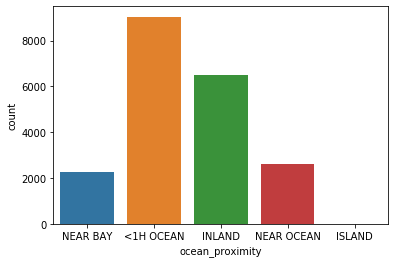

In [7]:
sns.countplot(x=df_housing['ocean_proximity'],data=df_housing)
plt.show()

In [8]:
#Converting string into integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['ocean_proximity']
df_housing[col] = le.fit_transform(df_housing[col])

C:\Users\j\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
df_housing['ocean_proximity'].value_counts()

0    9034
1    6496
4    2628
3    2270
2       5
Name: ocean_proximity, dtype: int64

In [10]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [11]:
df_housing_corr=df_housing.corr()
df_housing_corr
#median_house_value has strong relationship with median_income attribute

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.289530
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.200801
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.112330
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.015363
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.069630
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.018251
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.014679
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.080488
ocean_proximity,-0.289530,0.200801,0.112330,-0.015363,-0.014768,-0.069630,-0.018251,-0.014679,0.080488,1.000000


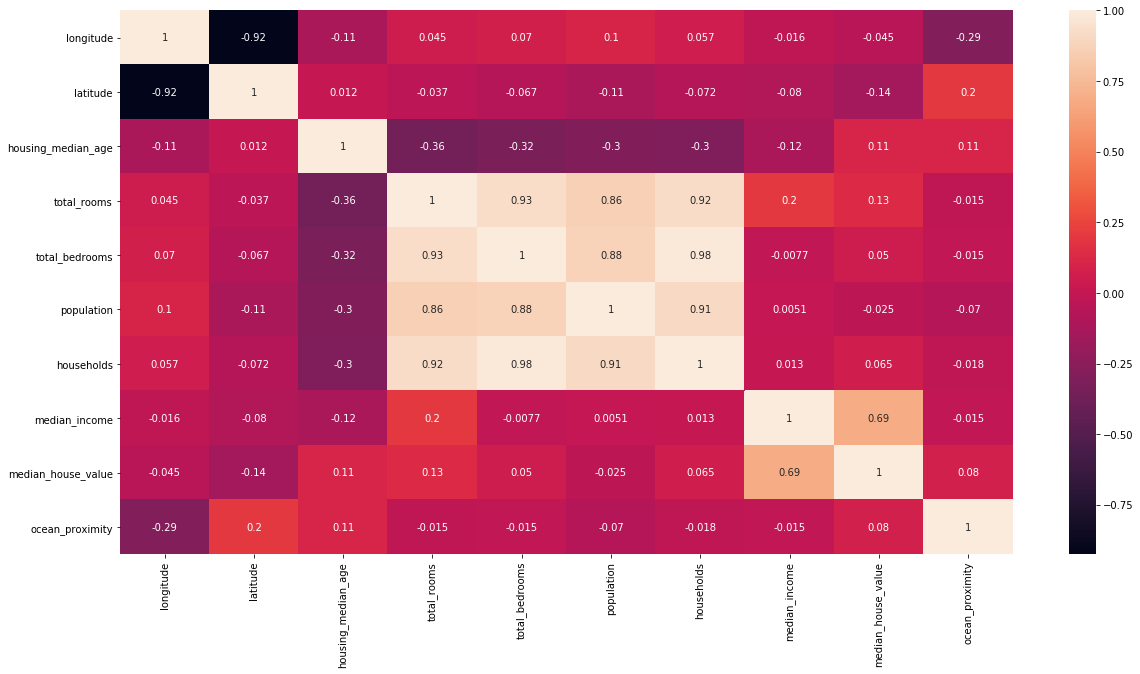

In [12]:
#Correlation between attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df_housing_corr, annot=True)
plt.show()

In [13]:
df_housing.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [14]:
df_housing=df_housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income',
                       'ocean_proximity','median_house_value']]
df_housing.head()
#Rearranging the columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


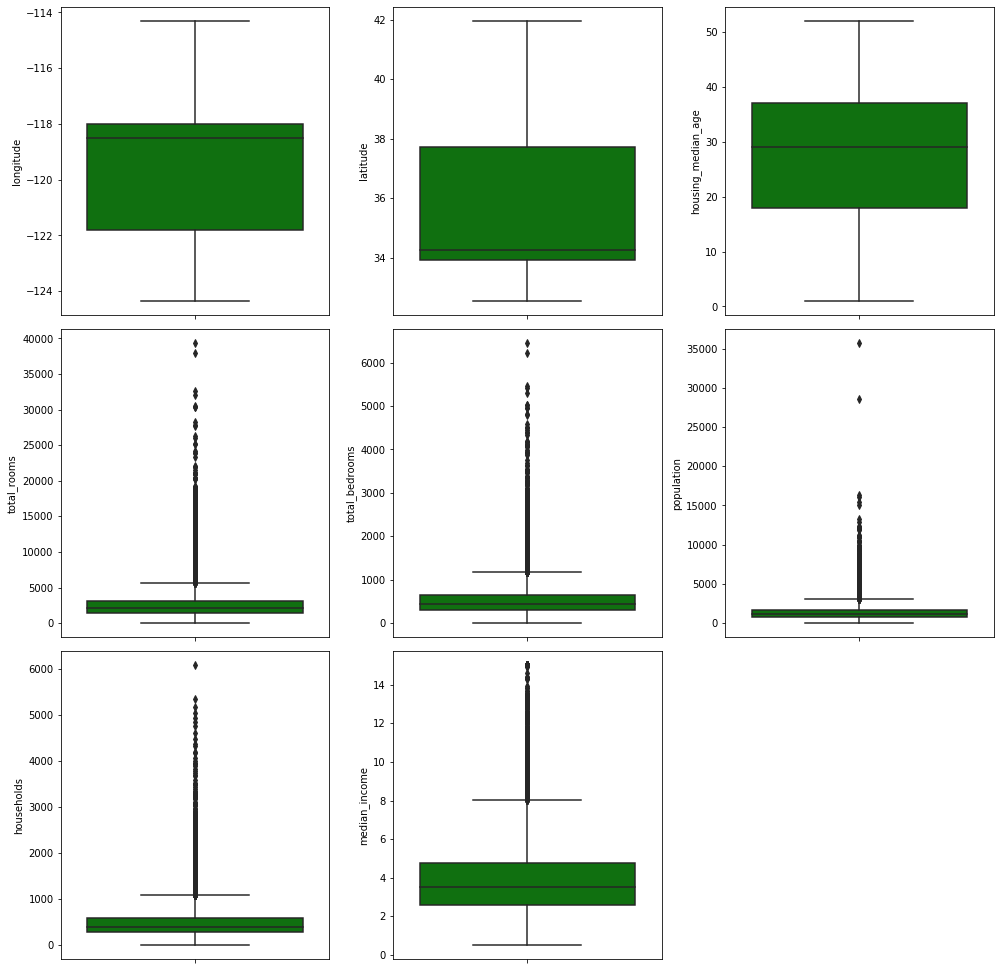

In [15]:
col_list=df_housing.iloc[:,0:8].columns.values
plt.figure(figsize=(14,18))
for i in range(0, len(col_list)):                                      
    plt.subplot(4,3,i+1)
    sns.boxplot(df_housing[col_list[i]], color="green", orient='v')
    plt.tight_layout()
#Boxplot to check outliers

In [16]:
df_housing1=df_housing.iloc[:,0:8]
from scipy.stats import zscore
z_score=abs(zscore(df_housing1))
print(df_housing.shape)
df_housing1_final=df_housing1.loc[(z_score<3).all(axis=1)]                  
print(df_housing1_final.shape)
#to quantify the outliers

(20433, 10)
(19549, 8)


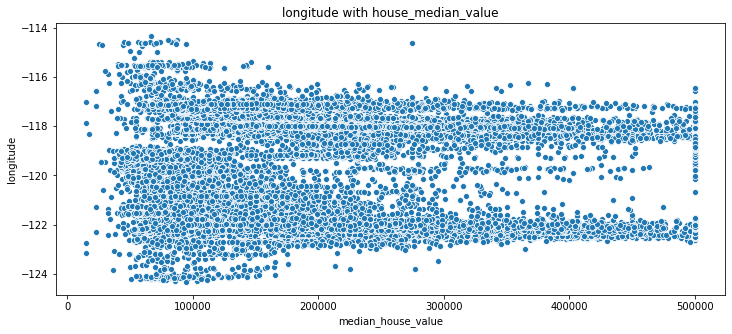

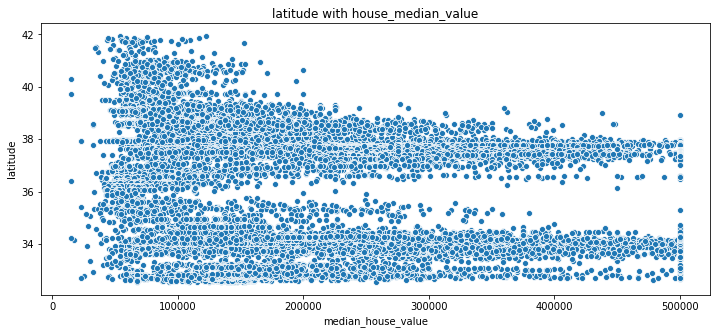

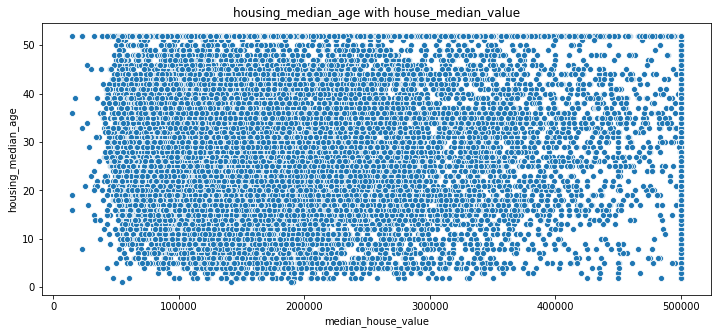

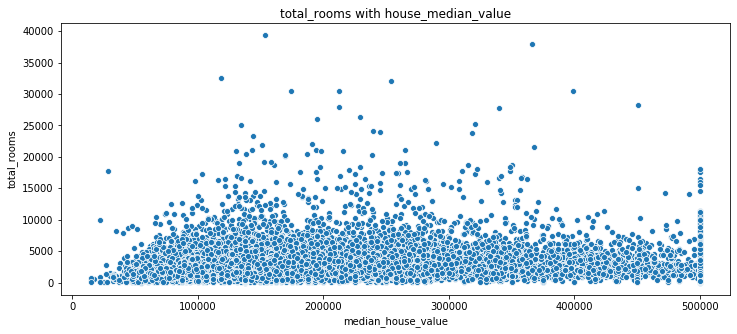

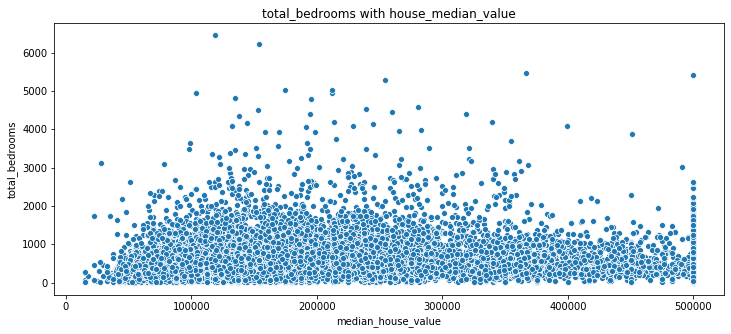

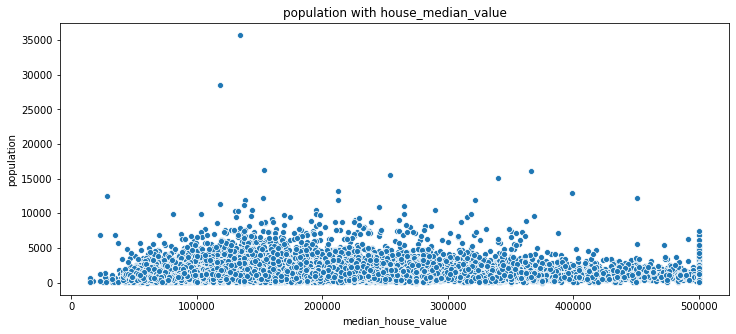

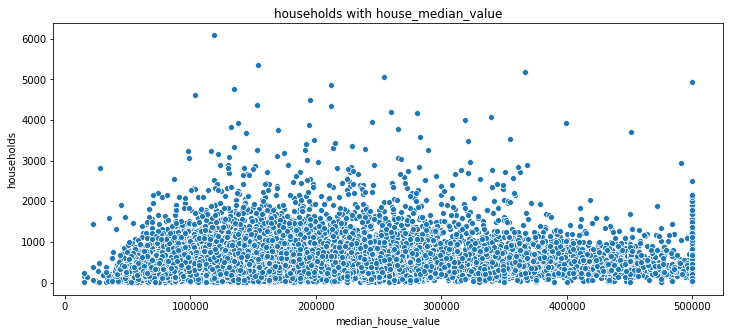

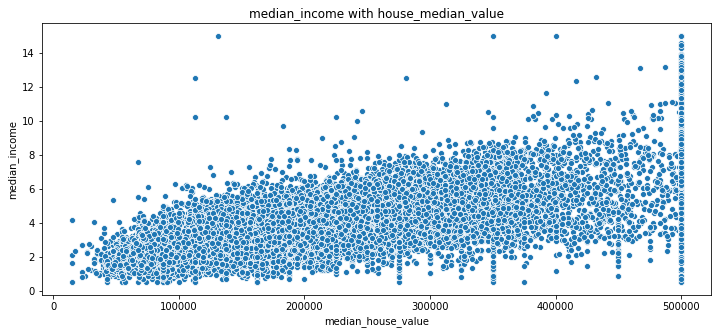

In [17]:
#Scatter Plot to show the relationships between target and feature attributes
cols = df_housing.iloc[:,0:8]
for col in cols:
    plt.figure(figsize=(12, 5))
    plt.title(str(col) +' with' + ' house_median_value')
    sns.scatterplot(x=df_housing['median_house_value'], y=df_housing[col], data=df_housing)
    plt.show()

In [18]:
#Splitting of data
x = df_housing.iloc[:,:8]
y = df_housing['median_house_value']

In [19]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [20]:
#Testing the models at random state 42 along with their r2 score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))
#After the testing several models, we have found that RandomForestRegressor is giving highest r2 score at random state 42.

0.6400865688993737
0.6602083961932415
-0.04976086061234741
0.713822317238002
0.8218463653405048


In [21]:
#Now we will check at what randome state, RandomForestRegressor model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=RandomForestRegressor()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with RandomForestRegressor model is  0.83426710122501, which is at random state 76

r2 score corresponding to random state:  42  is:  0.8223052371253381
r2 score corresponding to random state:  43  is:  0.8154984159570812
r2 score corresponding to random state:  44  is:  0.8269934185337282
r2 score corresponding to random state:  45  is:  0.8176073731183408
r2 score corresponding to random state:  46  is:  0.8311643287937442
r2 score corresponding to random state:  47  is:  0.8262360439162794
r2 score corresponding to random state:  48  is:  0.8309710749650515
r2 score corresponding to random state:  49  is:  0.8200386200151082
r2 score corresponding to random state:  50  is:  0.8178100373319968
r2 score corresponding to random state:  51  is:  0.8119807719420056
r2 score corresponding to random state:  52  is:  0.8180998938838502
r2 score corresponding to random state:  53  is:  0.8154500497358355
r2 score corresponding to random state:  54  is:  0.809775595304712
r2 score corresponding to random state:  55  is:  0.8206040480381283
r2 score corresponding to random st

In [22]:
#Cross Validation of RFR
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),x,y,cv=5,scoring='r2').mean()

0.5871721780189018

In [23]:
#Implementing RandomForestRegressor model at random state 76
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=0.20)
rfr=RandomForestRegressor()            
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred))

0.8314946604077025


In [24]:
#Saving the model
import joblib
filename = 'Project13_model.sav'
joblib.dump(rfr, filename)

['Project13_model.sav']